In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv") #Loading the dataset

In [3]:
Data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
Data.shape #Checking the rows and columns

(614, 13)

In [5]:
Data.info() #Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Droping Loan_ID:

Data.drop("Loan_ID",axis=1,inplace=True)

In [7]:
Data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder #To encode object data type
from sklearn.impute import SimpleImputer #To impute null values

In [9]:
enc= LabelEncoder()
si= SimpleImputer()

In [10]:
Data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
Data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
Data['Dependents']=Data['Dependents'].replace({'3+':3})

In [13]:
Data['Gender']=Data['Gender'].replace({'Male':1,'Female':0})

In [14]:
Data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
Data['Married']=Data['Married'].replace({'No':0,'Yes':1})

In [16]:
Data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
Data['Education']=Data['Education'].replace({'Not Graduate':0,'Graduate':1})

In [18]:
Data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
Data['Self_Employed']=Data['Self_Employed'].replace({'No':0,'Yes':1})

In [20]:
Data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
Data['Property_Area']=Data['Property_Area'].replace({'Urban':0,'Rural':1,'Semiurban':2})

In [22]:
Data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [23]:
Data['Loan_Status']=Data['Loan_Status'].replace({'Y':1,'N':0})

In [24]:
Data.info() #After Transfomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 57.7+ KB


In [25]:
Data.isnull().sum() #After Transfomation

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
Data.dropna(inplace=True)

In [27]:
Data=Data.reset_index() #reseting the index after dropping the values

In [28]:
Data

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
1,2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
2,3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
3,4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
4,5,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
476,610,1.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
477,611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
478,612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


In [29]:
#Dropping data will all null values

In [30]:
Data.isnull().sum() #After dropping all null values

index                0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

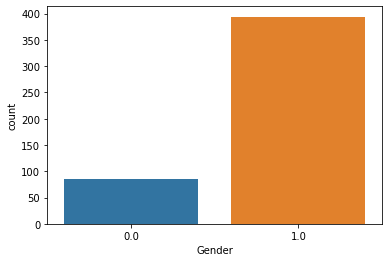

In [31]:
sns.countplot(Data['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

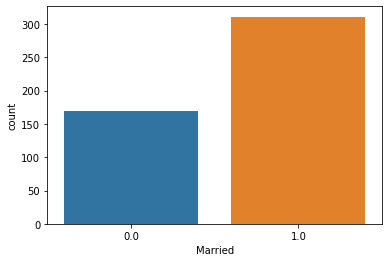

In [32]:
sns.countplot(Data['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

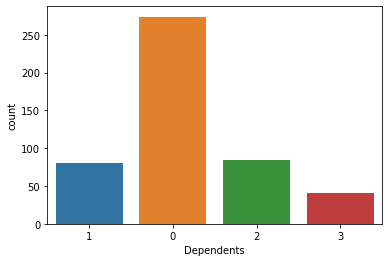

In [33]:
sns.countplot(Data['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

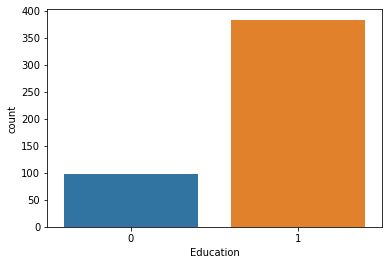

In [34]:
sns.countplot(Data['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

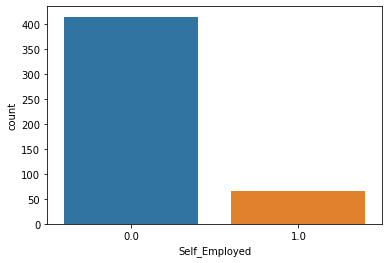

In [35]:
sns.countplot(Data['Self_Employed'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

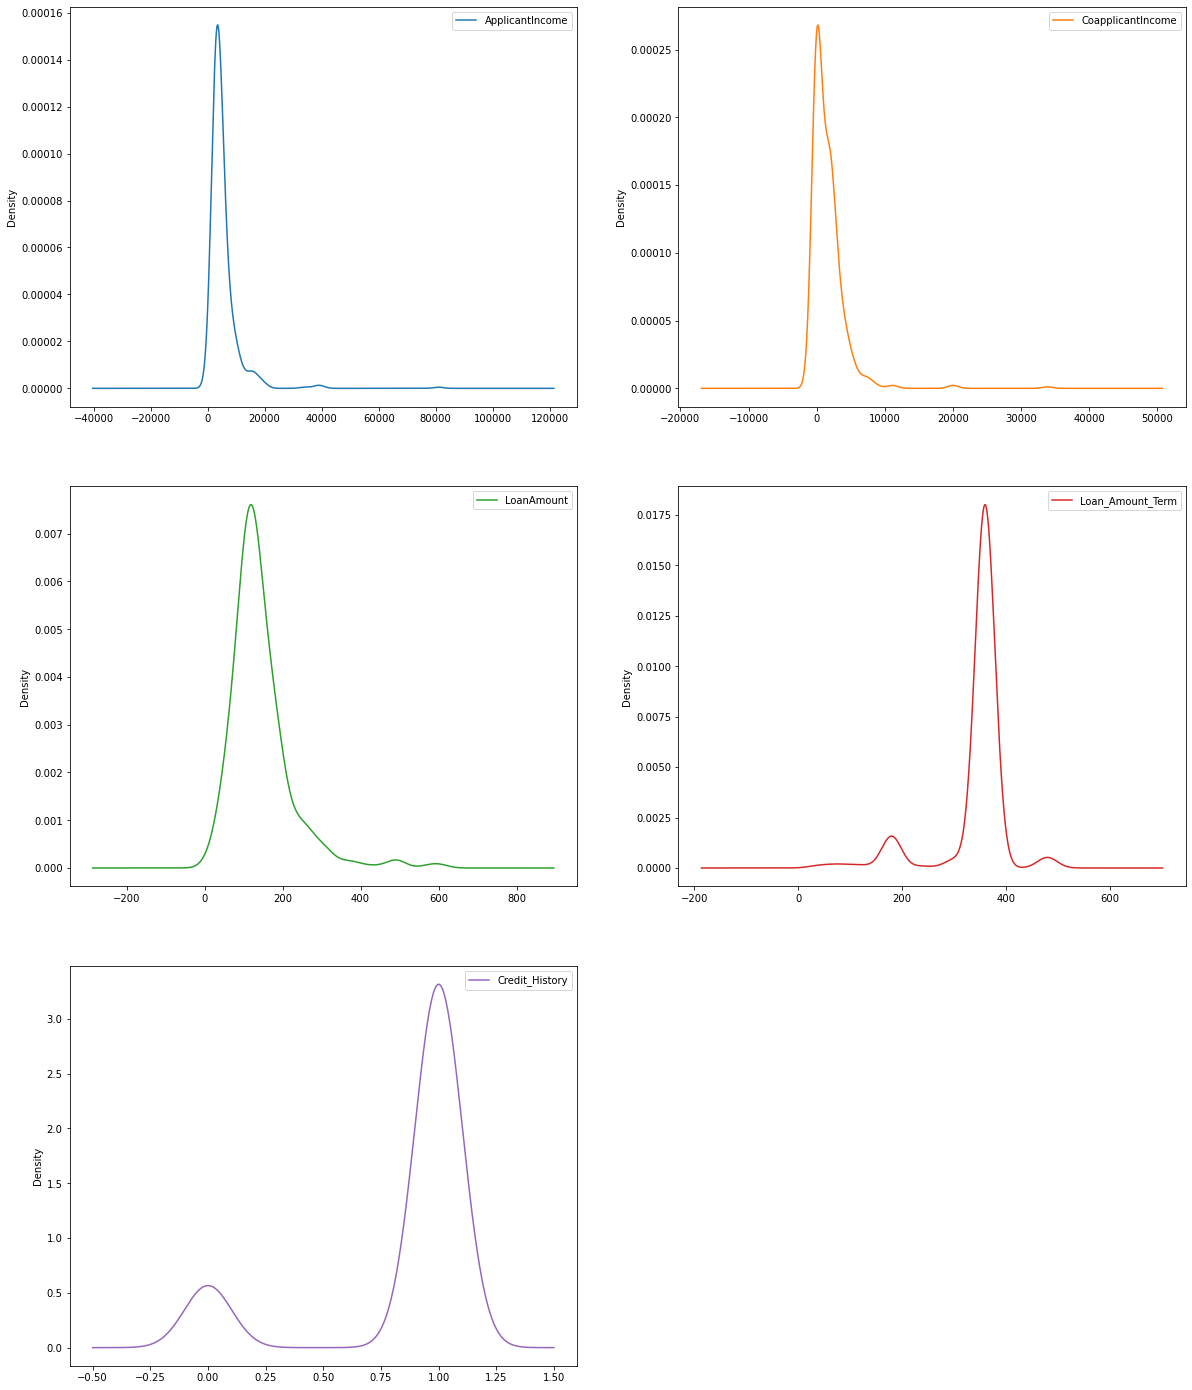

In [36]:
Data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].plot(kind='kde',subplots=True,layout=(3,2),sharex=False,legend=True,fontsize=10,figsize=(20,25))

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

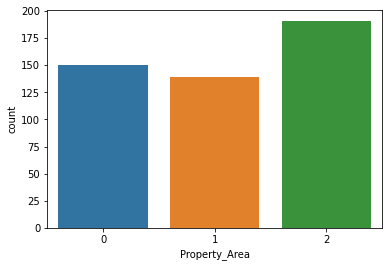

In [37]:
sns.countplot(Data['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

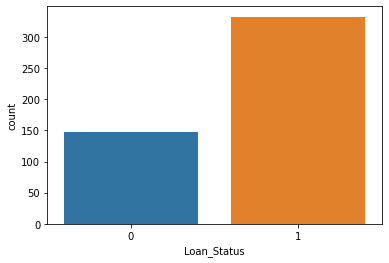

In [38]:
sns.countplot(Data['Loan_Status'])

In [39]:
#Observation:
#There is a majority of male gender, married people, educated,self employed with people living in urban areas in the dataset
# As per graph, it shows few incomes are in negative which will be investigated
#Majority of people have been given loans

In [40]:
Data['Loan_Status'].value_counts() #Checking the value of the target variable

1    332
0    148
Name: Loan_Status, dtype: int64

In [41]:
#Data is balanced


In [42]:
Data.describe()

,index,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,307.214583,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.085417,0.691667
std,177.433330,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.839398,0.462287
min,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,154.750000,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,302.500000,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.500000,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [43]:
#There is a huge difference between mean and std deviation as well as maximum and minimum values

In [44]:
X=Data.drop('Loan_Status',axis=1)
Y=Data['Loan_Status'] #Seperating the target and classes

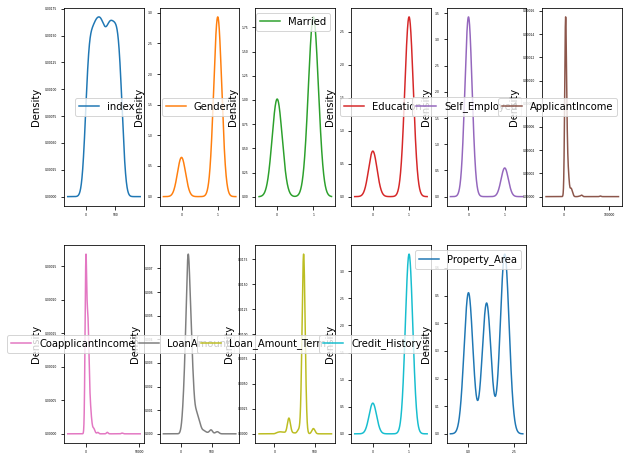

In [46]:
X.plot(kind='kde',subplots=True,layout=(2,6),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show()

In [47]:
X.skew().sort_values(ascending=False) #Checking the skewness

ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Self_Employed        2.111872
Dependents           0.942272
index               -0.000692
Property_Area       -0.162285
Married             -0.621334
Education           -1.488474
Gender              -1.678471
Credit_History      -2.013253
Loan_Amount_Term    -2.333710
dtype: float64

In [48]:
from sklearn.preprocessing import power_transform

In [49]:
New_X=power_transform(X)

In [50]:
pd.DataFrame(New_X,columns=X.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

Self_Employed        2.111872
Loan_Amount_Term     0.400696
Dependents           0.391653
LoanAmount           0.044294
ApplicantIncome     -0.112745
CoapplicantIncome   -0.127432
Property_Area       -0.208161
index               -0.285838
Married             -0.621334
Education           -1.488474
Gender              -1.678471
Credit_History      -2.013253
dtype: float64

In [51]:
X=pd.DataFrame(New_X,columns=X.columns)

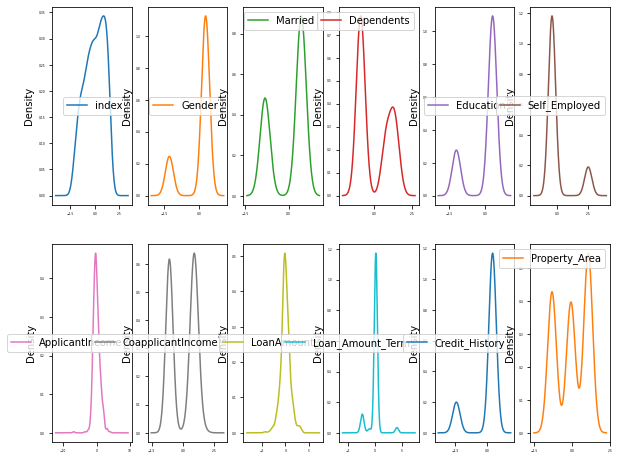

In [52]:
X.plot(kind='kde',subplots=True,layout=(2,6),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #Checking skewness after transformation

In [53]:
X.isnull().sum()

index                0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [54]:
#Checking whether any value is lost while reducing the data skewness

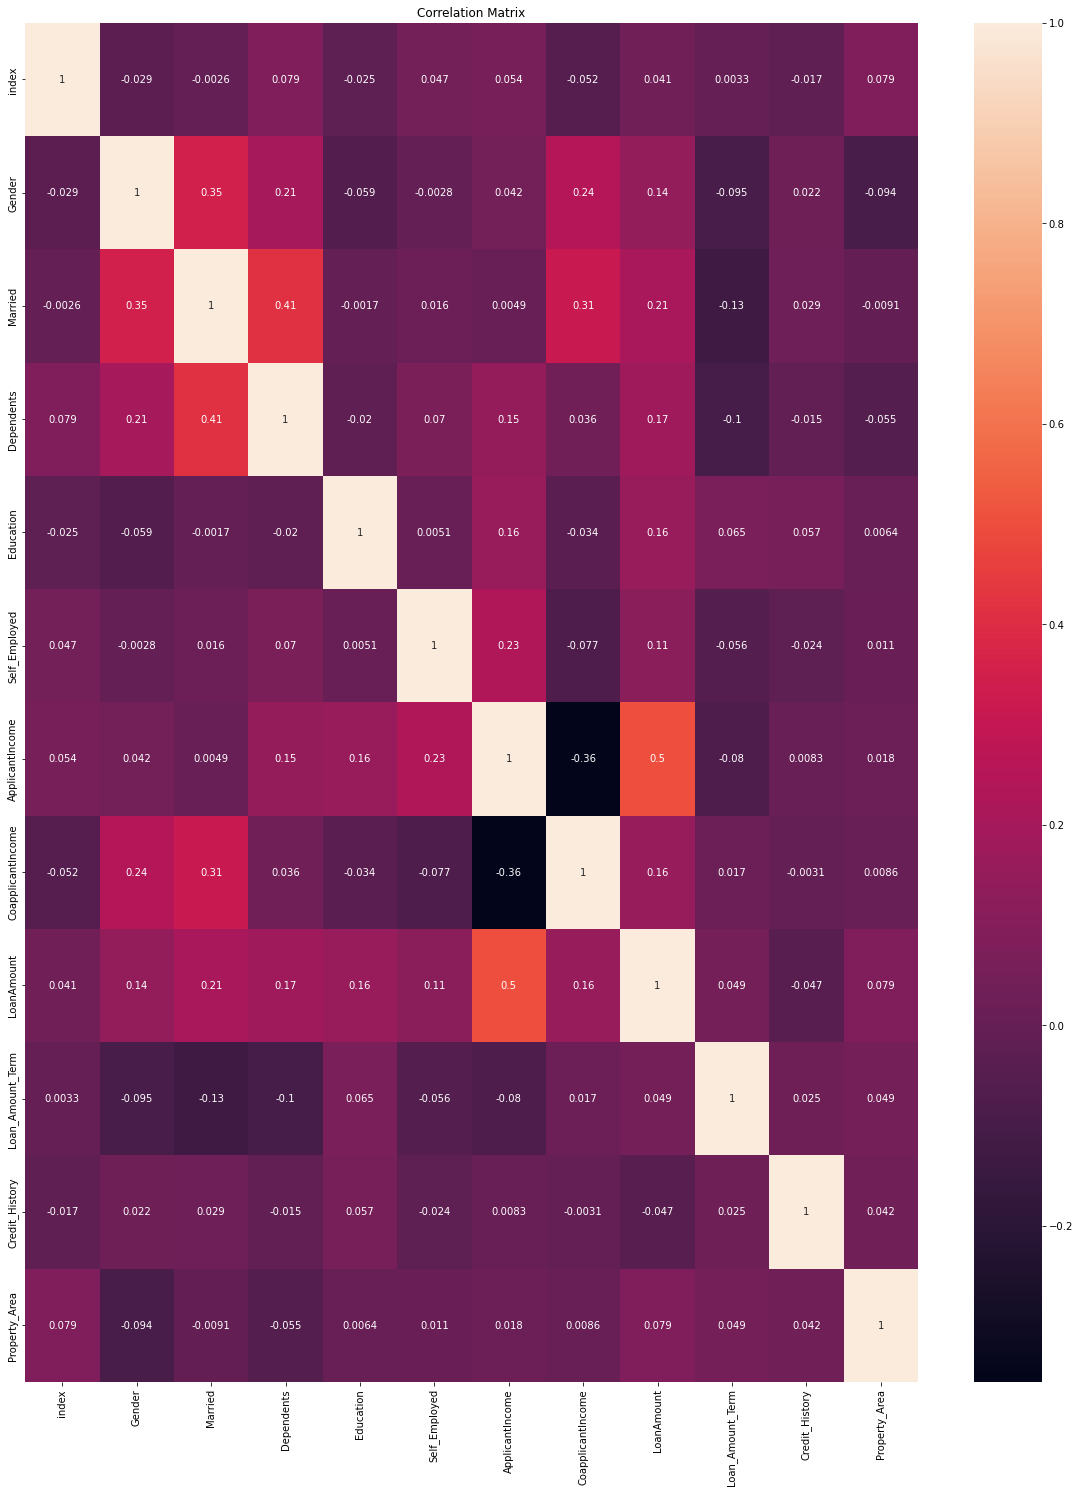

In [55]:
corr_mat=X.corr()
plt.figure(figsize=[20,25])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [56]:
#Looking at the above data, there is no multicollinearity between any values
#Therefore checking by VIF

In [57]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,index,1.021259
1,Gender,1.209721
2,Married,1.466107
3,Dependents,1.271286
4,Education,1.055003
5,Self_Employed,1.061066
6,ApplicantIncome,1.930826
7,CoapplicantIncome,1.545321
8,LoanAmount,1.705847
9,Loan_Amount_Term,1.057035


In [58]:
#Therefore from the above data there is no multicollinearity issue

In [59]:
X.shape

(480, 12)

In [60]:
Y.shape

(480,)

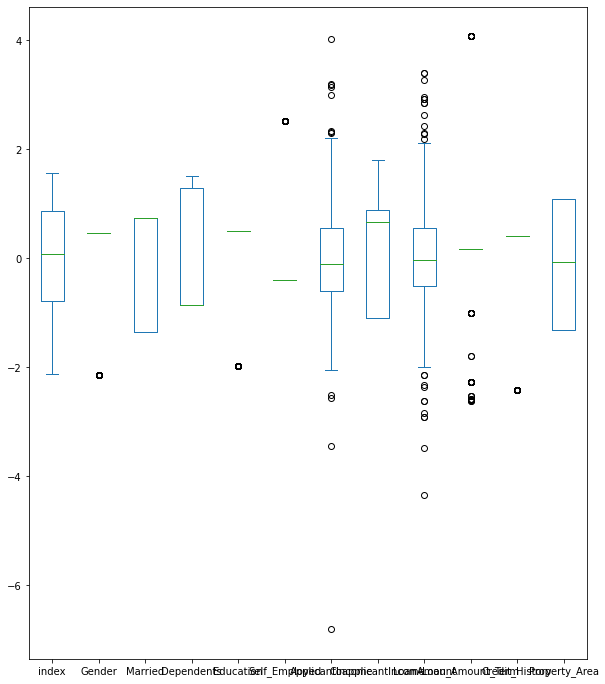

In [61]:
X.plot(kind='box',figsize=(10,12),layout=(4,3))
plt.show() #checking for oultiers

In [62]:
#From the above data there is presence of too many outliers

In [63]:
from scipy.stats import zscore

In [64]:
(np.abs(zscore(X)<3)).all()

index                 True
Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome     True
LoanAmount           False
Loan_Amount_Term     False
Credit_History        True
Property_Area         True
dtype: bool

In [65]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X))>3)
index

(array([ 12,  60,  85, 120, 120, 130, 139, 144, 170, 193, 236, 277, 284,
        286, 293, 319, 347, 390, 390, 403, 438, 444, 448], dtype=int64),
 array([8, 9, 9, 6, 8, 9, 9, 6, 6, 9, 9, 9, 9, 8, 9, 6, 6, 6, 9, 9, 8, 8,
        9], dtype=int64))

In [66]:
# assigning a variable to the values having less than 3 zscore
X_new = X[(np.abs(zscore(X))<3).all(axis=1)]
X_new

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-2.130019,0.467198,0.737162,0.786423,0.503253,-0.399275,0.164670,0.766892,-0.029189,0.174422,0.413197,-0.064878
1,-2.108933,0.467198,0.737162,-0.851464,0.503253,2.504541,-0.538339,-1.091163,-1.281195,0.174422,0.413197,-1.311201
2,-2.089806,0.467198,0.737162,-0.851464,-1.987072,-0.399275,-0.796236,0.904508,-0.156488,0.174422,0.413197,-1.311201
3,-2.072014,0.467198,-1.356553,-0.851464,0.503253,-0.399275,0.591486,-1.091163,0.163801,0.174422,0.413197,-1.311201
4,-2.055220,0.467198,0.737162,1.277424,0.503253,2.504541,0.431341,1.086684,1.505559,0.174422,0.413197,-1.311201
...,...,...,...,...,...,...,...,...,...,...,...,...
475,1.535875,-2.140419,-1.356553,-0.851464,0.503253,-0.399275,-0.596311,-1.091163,-1.149005,0.174422,0.413197,-0.064878
476,1.540238,0.467198,0.737162,1.507472,0.503253,-0.399275,-0.013885,-1.091163,-2.149682,-2.278046,0.413197,-0.064878
477,1.544599,0.467198,0.737162,0.786423,0.503253,-0.399275,1.044108,0.233802,1.387711,0.174422,0.413197,-1.311201
478,1.548957,0.467198,0.737162,1.277424,0.503253,-0.399275,0.950234,-1.091163,0.742412,0.174422,0.413197,-1.311201


In [67]:
X_new.shape #checking the shape of feature variable after removing the data

(459, 12)

In [68]:
Y_new=Y.drop(index[0],axis=0)
Y_new  #removing the outliers from target variables

0      0
1      1
2      1
3      1
4      1
      ..
475    1
476    1
477    1
478    1
479    0
Name: Loan_Status, Length: 459, dtype: int64

In [69]:
Y_new.shape ##checking the shape of target variable after removing the data

(459,)

In [70]:
Scalar=StandardScaler() #scaling the data

In [73]:
X_Scaled=Scalar.fit_transform(X_new)
X_Scaled

array([[-2.12041055,  0.46291005,  0.73151696, ...,  0.35906474,
         0.40617068, -0.05932324],
       [-2.09938566,  0.46291005,  0.73151696, ...,  0.35906474,
         0.40617068, -1.30693701],
       [-2.08031384,  0.46291005,  0.73151696, ...,  0.35906474,
         0.40617068, -1.30693701],
       ...,
       [ 1.54357015,  0.46291005,  0.73151696, ...,  0.35906474,
         0.40617068, -1.30693701],
       [ 1.54791619,  0.46291005,  0.73151696, ...,  0.35906474,
         0.40617068, -1.30693701],
       [ 1.5522602 , -2.1602469 , -1.36702231, ...,  0.35906474,
        -2.46201918,  1.08369195]])

# Logistic Regression

In [71]:
LR=LogisticRegression()

In [74]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.8260869565217391
/n
At random state 1 the testing accurancy is:- 0.8913043478260869
/n
At random state 2 the testing accurancy is:- 0.8043478260869565
/n
At random state 3 the testing accurancy is:- 0.8369565217391305
/n
At random state 4 the testing accurancy is:- 0.8043478260869565
/n
At random state 5 the testing accurancy is:- 0.782608695652174
/n
At random state 6 the testing accurancy is:- 0.8804347826086957
/n
At random state 7 the testing accurancy is:- 0.8043478260869565
/n
At random state 8 the testing accurancy is:- 0.7934782608695652
/n
At random state 9 the testing accurancy is:- 0.8260869565217391
/n
At random state 10 the testing accurancy is:- 0.8260869565217391
/n
At random state 11 the testing accurancy is:- 0.8043478260869565
/n
At random state 12 the testing accurancy is:- 0.7934782608695652
/n
At random state 13 the testing accurancy is:- 0.8369565217391305
/n
At random state 14 the testing accurancy is:- 0.84782608695

# Random Forest Classifier

In [76]:
rfc=RandomForestClassifier()

In [77]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    rfc.fit(X_train,y_train)
    pred_test=rfc.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.8260869565217391
/n
At random state 1 the testing accurancy is:- 0.8695652173913043
/n
At random state 2 the testing accurancy is:- 0.8152173913043478
/n
At random state 3 the testing accurancy is:- 0.8369565217391305
/n
At random state 4 the testing accurancy is:- 0.7934782608695652
/n
At random state 5 the testing accurancy is:- 0.8152173913043478
/n
At random state 6 the testing accurancy is:- 0.8695652173913043
/n
At random state 7 the testing accurancy is:- 0.8043478260869565
/n
At random state 8 the testing accurancy is:- 0.8152173913043478
/n
At random state 9 the testing accurancy is:- 0.8043478260869565
/n
At random state 10 the testing accurancy is:- 0.7608695652173914
/n
At random state 11 the testing accurancy is:- 0.8043478260869565
/n
At random state 12 the testing accurancy is:- 0.7934782608695652
/n
At random state 13 the testing accurancy is:- 0.8586956521739131
/n
At random state 14 the testing accurancy is:- 0.8152173913

# Decision Tree

In [78]:
DT=DecisionTreeClassifier()

In [79]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    DT.fit(X_train,y_train)
    pred_test=DT.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.7282608695652174
/n
At random state 1 the testing accurancy is:- 0.7717391304347826
/n
At random state 2 the testing accurancy is:- 0.6739130434782609
/n
At random state 3 the testing accurancy is:- 0.7717391304347826
/n
At random state 4 the testing accurancy is:- 0.782608695652174
/n
At random state 5 the testing accurancy is:- 0.7608695652173914
/n
At random state 6 the testing accurancy is:- 0.7391304347826086
/n
At random state 7 the testing accurancy is:- 0.782608695652174
/n
At random state 8 the testing accurancy is:- 0.75
/n
At random state 9 the testing accurancy is:- 0.75
/n
At random state 10 the testing accurancy is:- 0.6195652173913043
/n
At random state 11 the testing accurancy is:- 0.7282608695652174
/n
At random state 12 the testing accurancy is:- 0.7282608695652174
/n
At random state 13 the testing accurancy is:- 0.7391304347826086
/n
At random state 14 the testing accurancy is:- 0.7608695652173914
/n
At random state 15 t

# Gradient Boosting

In [80]:
GB=GradientBoostingClassifier()

In [81]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=i)
    GB.fit(X_train,y_train)
    pred_test=GB.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',accuracy_score(y_test,pred_test))
    print("/n")

At random state 0 the testing accurancy is:- 0.75
/n
At random state 1 the testing accurancy is:- 0.8586956521739131
/n
At random state 2 the testing accurancy is:- 0.782608695652174
/n
At random state 3 the testing accurancy is:- 0.7934782608695652
/n
At random state 4 the testing accurancy is:- 0.782608695652174
/n
At random state 5 the testing accurancy is:- 0.8260869565217391
/n
At random state 6 the testing accurancy is:- 0.7934782608695652
/n
At random state 7 the testing accurancy is:- 0.8152173913043478
/n
At random state 8 the testing accurancy is:- 0.7717391304347826
/n
At random state 9 the testing accurancy is:- 0.8043478260869565
/n
At random state 10 the testing accurancy is:- 0.7391304347826086
/n
At random state 11 the testing accurancy is:- 0.8043478260869565
/n
At random state 12 the testing accurancy is:- 0.782608695652174
/n
At random state 13 the testing accurancy is:- 0.8478260869565217
/n
At random state 14 the testing accurancy is:- 0.8478260869565217
/n
At rand

# Cross Validation for LR

In [83]:
for i in range(2,6):
    LR_Val=cross_val_score(LR,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.8170400607556483
The cross validation score for 3 is 0.8017429193899782
The cross validation score for 4 is 0.7952707856598017
The cross validation score for 5 is 0.8061634018155758


# Cross Validation for RFC

In [84]:
for i in range(2,6):
    RFC_Val=cross_val_score(rfc,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",RFC_Val.mean())

The cross validation score for 2 is 0.6843459274729448
The cross validation score for 3 is 0.6470588235294118
The cross validation score for 4 is 0.6822463768115943
The cross validation score for 5 is 0.7887482083134257


# Cross Validation for DT

In [85]:
for i in range(2,6):
    DT_Val=cross_val_score(DT,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",DT_Val.mean())

The cross validation score for 2 is 0.5342794759825328
The cross validation score for 3 is 0.5751633986928105
The cross validation score for 4 is 0.6057780320366133
The cross validation score for 5 is 0.6776158623984712


# Cross Validation for GB

In [87]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean())

The cross validation score for 2 is 0.560356939434213
The cross validation score for 3 is 0.6252723311546842
The cross validation score for 4 is 0.6536994660564455
The cross validation score for 5 is 0.7735308170090779


### Looking at the accuracy score and cross validation value, Logistic Regression is suitable for this dataset with least difference between accuracy score and cross validation

In [99]:
LogReg=LogisticRegression()

In [ ]:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)

In [100]:
parameters={'penalty':['l1','l2'],'max_iter':[100,500,1000]}
clf=GridSearchCV(LogReg,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2']})

In [101]:
clf.best_params_

{'max_iter': 100, 'penalty': 'l2'}

In [102]:
LogReg=LogisticRegression(max_iter=100)

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=6)
LogReg.fit(X_train,y_train)
pred_test=LogReg.predict(X_test)

In [104]:
Logistic_Accuracy=accuracy_score(y_test,pred_test)
Logistic_Accuracy

0.8804347826086957

In [108]:
LogReg=LogisticRegression(max_iter=200)

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=6)
LogReg.fit(X_train,y_train)
pred_test=LogReg.predict(X_test)

In [110]:
Logistic_Accuracy=accuracy_score(y_test,pred_test)
Logistic_Accuracy

0.8804347826086957

In [112]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[11, 11],
       [ 0, 70]], dtype=int64)

In [111]:
#It seems that after hyper parameter tuning the score remains same, hence going with logistic regression for this dataset

# Saving the model

In [113]:
import pickle
filename='Loan Application.pkl'
pickle.dump(rfc,open(filename,'wb'))